In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Creating DataFrame df from CSV StandDF
df = pd.read_csv('ReadyDF2', index_col=0)

# Displaying first five results 
df.head()

,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,0,1,0.462810,1.0,0.749962,0.427561,1.0,0.476417,0.949896,0.534453,0.523574,0.466548,0.425373,0.436937,0.457490
1,1,0,0.589876,0.0,0.583748,0.340352,0.0,0.609551,0.000000,0.545989,0.887042,0.850134,0.492537,1.000000,0.854251
2,1,0,0.330579,1.0,0.717213,0.223303,0.0,0.410536,0.000000,0.524832,0.216722,0.140946,0.417910,0.058559,0.137652
3,1,1,0.822314,1.0,0.714502,0.234437,0.0,0.401299,0.000000,0.265799,0.343041,0.305085,0.559701,0.175676,0.340081
4,0,1,0.289256,1.0,0.499347,0.987789,1.0,0.458048,0.869249,0.393150,0.596766,0.493310,0.462687,0.581081,0.570850


In [3]:
## Separate target variables from Data Frame 
## Using .ravel() to create a contiguous flattened array to change the shape of (n_samples)

####ERROR for.len()---vector y was passed when a 1d array was expected. 
####Please change the shape of y to (n_samples, ), for example using ravel().
  ##y = column_or_1d(y, warn=True)
    
y1 =df.loc[:, ['Y1']].values.ravel()
y2 =df.loc[:, ['Y2']].values.ravel()

## Drop target variables from Data Frame 
df = df.drop(['Y1','Y2'], axis=1)

## Drop C6' from DF1 
df1 = df.drop(["C6'"], axis=1)

In [4]:
# Recursive Feature Elimination for Y1 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(df1, y1)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False  True False False  True False]
[ 5  7  1  3  8  4  6  1  9  2  1 10]


In [5]:
# Recursive Feature Elimination for Y2 target 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(df, y2)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False  True False False False False  True
 False]
[10  3  1  4 11  2  1  5  6  7  8  1  9]


In [6]:

# Checking how many features this dataset have

print(df.shape[1])

13


In [7]:
for i in range(1, df.shape[1]+1):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes; Target Variable Y1
    rfe = RFE(model, i)
    rfe = rfe.fit(df1, y1)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

1
Model with the best 1 features
[False False False False False False False False False False  True False]
[ 7  9  2  5 10  6  8  3 11  4  1 12]
2
Model with the best 2 features
[False False  True False False False False False False False  True False]
[ 6  8  1  4  9  5  7  2 10  3  1 11]
3
Model with the best 3 features
[False False  True False False False False  True False False  True False]
[ 5  7  1  3  8  4  6  1  9  2  1 10]
4
Model with the best 4 features
[False False  True False False False False  True False  True  True False]
[4 6 1 2 7 3 5 1 8 1 1 9]
5
Model with the best 5 features
[False False  True  True False False False  True False  True  True False]
[3 5 1 1 6 2 4 1 7 1 1 8]
6
Model with the best 6 features
[False False  True  True False  True False  True False  True  True False]
[2 4 1 1 5 1 3 1 6 1 1 7]
7
Model with the best 7 features
[ True False  True  True False  True False  True False  True  True False]
[1 3 1 1 4 1 2 1 5 1 1 6]
8
Model with the best 8 features


In [8]:
for i in range(1, df.shape[1]+1):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes; Target Variable Y2
    rfe = RFE(model, i)
    rfe = rfe.fit(df, y2)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(rfe.support_)
    print(rfe.ranking_)

1
Model with the best 1 features
[False False False False False False  True False False False False False
 False]
[12  5  3  6 13  4  1  7  8  9 10  2 11]
2
Model with the best 2 features
[False False False False False False  True False False False False  True
 False]
[11  4  2  5 12  3  1  6  7  8  9  1 10]
3
Model with the best 3 features
[False False  True False False False  True False False False False  True
 False]
[10  3  1  4 11  2  1  5  6  7  8  1  9]
4
Model with the best 4 features
[False False  True False False  True  True False False False False  True
 False]
[ 9  2  1  3 10  1  1  4  5  6  7  1  8]
5
Model with the best 5 features
[False  True  True False False  True  True False False False False  True
 False]
[8 1 1 2 9 1 1 3 4 5 6 1 7]
6
Model with the best 6 features
[False  True  True  True False  True  True False False False False  True
 False]
[7 1 1 1 8 1 1 2 3 4 5 1 6]
7
Model with the best 7 features
[False  True  True  True False  True  True  True False False Fa

In [9]:
###extra trees classifier to report feature importance, 
###and use an abitrary 0.4 value to filter the features
#The idea is whatever features passing the threshold would be selected

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data; Target Variable Y1

model = ExtraTreesClassifier()
model.fit(df1, y1)
# display the relative importance of each attribute
print(model.feature_importances_ > .5)


[False False False False False False False False False False False False]


In [10]:
###extra trees classifier to report feature importance, 
###and use an abitrary 0.4 value to filter the features
#The idea is whatever features passing the threshold would be selected

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data; Target Variable 

model = ExtraTreesClassifier()
model.fit(df, y2)
# display the relative importance of each attribute
print(model.feature_importances_ > .5)

[False False False False False False False False False False False False
 False]


Feature ranking:
1. feature 10 (0.111138)
2. feature 2 (0.107620)
3. feature 3 (0.104233)
4. feature 0 (0.094456)
5. feature 6 (0.094036)
6. feature 7 (0.092347)
7. feature 5 (0.090262)
8. feature 8 (0.089247)
9. feature 9 (0.087161)
10. feature 11 (0.082627)
11. feature 4 (0.025502)
12. feature 1 (0.021370)


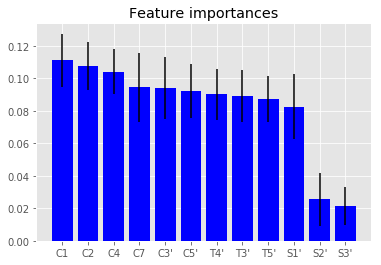

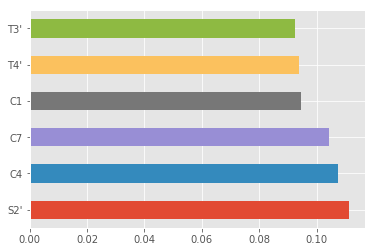

In [13]:
# Build a forest and compute the feature importances
model = ExtraTreesClassifier()
model.fit(df1, y1)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1 , indices[f], importances[indices[f]]))
    

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df1.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(df1.shape[1]), df1.columns)
plt.xlim([-1, df1.shape[1]])
plt.show()


feat_importances = pd.Series(model.feature_importances_, index=df1.columns)
feat_importances.nlargest(6).plot(kind='barh')

#The blue bars are the feature 
##importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 2 (0.096990)
2. feature 5 (0.094701)
3. feature 0 (0.091852)
4. feature 11 (0.091737)
5. feature 10 (0.086417)
6. feature 12 (0.083685)
7. feature 7 (0.083040)
8. feature 9 (0.082815)
9. feature 8 (0.079457)
10. feature 6 (0.078436)
11. feature 3 (0.075311)
12. feature 4 (0.034418)
13. feature 1 (0.021141)


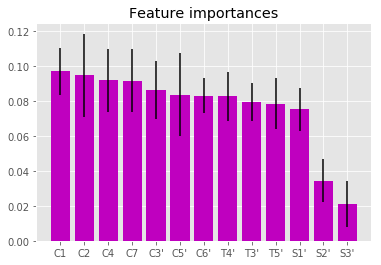

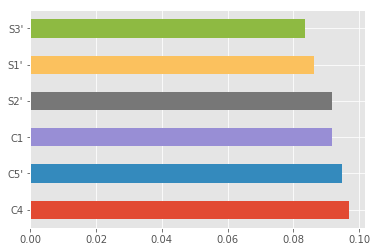

In [14]:
# Build a forest and compute the feature importances
model = ExtraTreesClassifier()
model.fit(df, y2)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices],
       color="m", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), df.columns)
plt.xlim([-1, df.shape[1]])
plt.show()


feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(6).plot(kind='barh')

#The red bars are the feature 
##importances of the forest, along with their inter-trees variability.